# AchromatCFW demo

This notebook demonstrates basic usage of the core functions in `achromatcfw.core.cfw`.

In [12]:
import sys
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Add ../src to the Python search path
sys.path.append(str(Path('..').resolve() / 'src'))

from achromatcfw.core.cfw import Edge, Farbsaum, Farbsaumbreite, ColorFringe

In [25]:
# Load chromatic focal shift data
chl_path = Path('..') / 'data' / 'raw' / 'defocus_chl_zf85.csv'
chl_df = pd.read_csv(chl_path)
CHLdata = chl_df['defocus_um'].to_numpy(dtype=float)
CHLdata[:31]

array([285., 190., 118.,  63.,  22.,  -9., -31., -46., -56., -62., -64.,
       -63., -60., -54., -48., -39., -30., -20.,  -9.,   3.,  15.,  28.,
        41.,  54.,  68.,  82.,  96., 111., 125., 139., 156.])

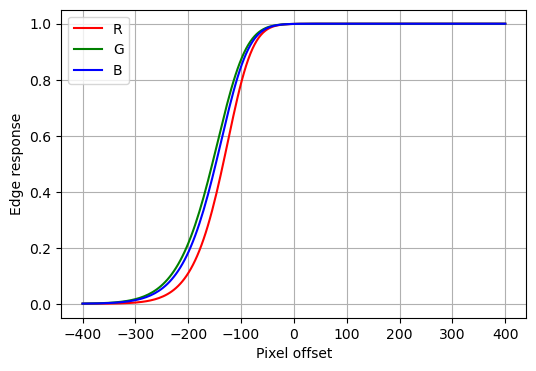

In [26]:
# Plot edge responses for each channel at z=0
xs = np.linspace(-400, 400, 200)
def_pos = 500
edge_R = [Edge('R', x, def_pos, CHLdata=CHLdata) for x in xs]
edge_G = [Edge('G', x, def_pos, CHLdata=CHLdata) for x in xs]
edge_B = [Edge('B', x, def_pos, CHLdata=CHLdata) for x in xs]

plt.figure(figsize=(6, 4))
plt.plot(xs, edge_R, label='R', color='r')
plt.plot(xs, edge_G, label='G', color='g')
plt.plot(xs, edge_B, label='B', color='b')
plt.xlabel('Pixel offset')
plt.ylabel('Edge response')
plt.legend()
plt.grid(True)
plt.show()

max = 66
mean = 28.545


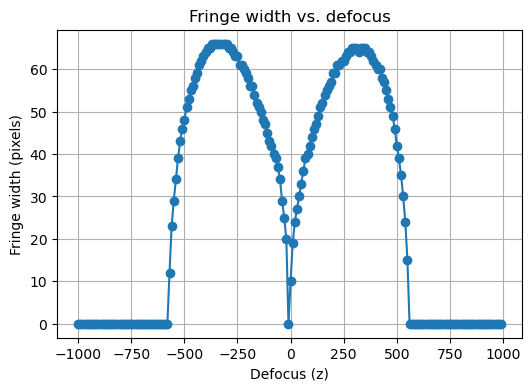

In [27]:
# Compute fringe width as a function of defocus
z_vals = np.arange(-1000, 1000, 10)
widths = [Farbsaumbreite(z, CHLdata=CHLdata) for z in z_vals]

max_width  = np.max(widths)   # 最大值
mean_width = np.mean(widths)  # 平均值

print("max =", max_width)
print("mean =", mean_width)

plt.figure(figsize=(6, 4))
plt.plot(z_vals, widths, marker='o')
plt.xlabel('Defocus (z)')
plt.ylabel('Fringe width (pixels)')
plt.title('Fringe width vs. defocus')
plt.grid(True)
plt.show()